In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nz
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import xlwings as xw
from networkx.drawing.nx_agraph import write_dot,graphviz_layout

In [13]:
data = pd.read_excel('network_macro.xlsm')

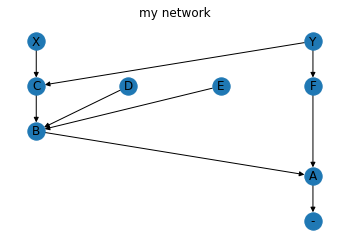

In [14]:
T = nx.DiGraph()  #create a directional graph
activities = data["next_assy"].unique().tolist()
T.add_nodes_from(activities)   #adding nodes
T.nodes() #view the nodes


activities_edges = [(a,b) for a,b in data[["material_activity","next_assy"]].to_numpy()]
T.add_edges_from(activities_edges)   #add edges
T.edges()

#add weights to the existing edges
i=0
for s,d in T.edges():
    T[s][d]['weight'] =data.loc[(data['material_activity']==s) & (data['next_assy']==d),'leadtime(day)'].to_list()[0]
    i+=1
T.edges(data=True)

#Graph the network

write_dot(T,'test.dot')

plt.title('my network')

pos = graphviz_layout(T,prog='dot')
nx.draw(T,pos,with_labels=True,arrows=True)
plt.savefig('nx_test.png')


In [15]:
print(nx.dag_longest_path(T,weight='weight'))
nx.dag_longest_path_length(T,weight='weight')

['Y', 'F', 'A', '-']


1310

In [66]:
def find_path_lenght(x):
    source = x['material_activity']
    target = '-'
    lenght=[]
    for path in nx.all_simple_edge_paths(T,str(source),str(target)):
        l = 0
        for i in range(len(path)):
            l += T[path[i][0]][path[i][1]]['weight']
        lenght.append(l)

    return max(lenght)

In [69]:
data['impacted_time'] = data.apply(find_path_lenght,axis=1)

In [70]:
data

,level,material_activity,qty,start_date,finish_date,leadtime(day),next_assy,total_time,impacted_time,critical_path,calc_start_date,calc_finish_date,impacted_time2
0,1,A,1,2022-12-10,2022-12-15,10,-,1310,10,yes,2026-04-07,2026-04-17,10
1,2,B,2,2022-11-15,2022-12-10,25,A,1310,35,yes,2026-03-13,2026-04-07,35
2,3,C,2,2022-10-20,2022-11-15,200,B,1310,235,yes,2025-08-25,2026-03-13,235
3,4,X,1,2022-09-10,2022-10-20,100,C,1310,335,NaN,2025-05-17,2025-08-25,335
4,4,Y,2,2022-09-10,2022-10-05,500,C,1310,1310,yes,2024-04-12,2025-08-25,1310
5,3,D,1,2022-09-10,2022-10-30,60,B,1310,95,NaN,2026-01-12,2026-03-13,95
6,3,E,1,2022-10-01,2022-10-15,80,B,1310,115,NaN,2025-12-23,2026-03-13,115
7,2,F,3,2022-09-15,2022-10-02,500,A,1310,510,NaN,2024-11-23,2026-04-07,510
8,3,Y,1,2022-09-10,2022-10-05,800,F,1310,1310,NaN,2024-04-12,2026-06-21,1310
